In [8]:
import os
print(os.getcwd())

C:\Users\Light\OneDrive\Documents


In [9]:
os.chdir("C:/Users/Light/OneDrive/Documents")

In [10]:
import pandas as pd

df = pd.read_csv("med.events.csv")  
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 

print(df)  

      PATIENT_ID DATE         PERDAY CATEGORY  DURATION
0       1         04/26/2033   4      medA      50     
1       1         07/04/2033   4      medB      30     
2       1         08/03/2033   4      medB      30     
3       1         08/17/2033   4      medB      30     
4       1         10/13/2033   4      medB      30     
5       1         10/16/2033   4      medB      30     
6       1         11/23/2033   4      medB      30     
7       1         01/19/2034   4      medB      30     
8       1         02/08/2034   4      medB      30     
9       1         03/08/2034   4      medB      30     
10      1         04/08/2034   4      medB      30     
11      1         05/10/2034   2      medB      30     
12      1         05/29/2034   2      medB      30     
13      1         06/28/2034   2      medB      30     
14      1         07/19/2034   2      medB      30     
15      1         08/31/2034   2      medB      30     
16      1         09/14/2034   2      medB      

In [30]:
import pandas as pd

df = pd.read_csv("med.events.csv")

df["DATE"] = pd.to_datetime(df["DATE"])

df = df.sort_values(by=["PATIENT_ID", "DATE"])

df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)  
df["prescription_gaps"] = (df["DATE"] - df["prev_DATE"]).dt.days  

df = df.dropna(subset=["prescription_gaps"])

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.colheader_justify', 'left')  

df = df.drop(columns=["prescription_gaps"])  
print(df)  



      PATIENT_ID DATE        PERDAY CATEGORY  DURATION prev_DATE 
1       1        2033-07-04   4      medB      30      2033-04-26
2       1        2033-08-03   4      medB      30      2033-07-04
3       1        2033-08-17   4      medB      30      2033-08-03
4       1        2033-10-13   4      medB      30      2033-08-17
5       1        2033-10-16   4      medB      30      2033-10-13
6       1        2033-11-23   4      medB      30      2033-10-16
7       1        2034-01-19   4      medB      30      2033-11-23
8       1        2034-02-08   4      medB      30      2034-01-19
9       1        2034-03-08   4      medB      30      2034-02-08
10      1        2034-04-08   4      medB      30      2034-03-08
11      1        2034-05-10   2      medB      30      2034-04-08
12      1        2034-05-29   2      medB      30      2034-05-10
13      1        2034-06-28   2      medB      30      2034-05-29
14      1        2034-07-19   2      medB      30      2034-06-28
15      1 

In [29]:
print("\nPrescription Gaps:")
print(df["event_interval"])


Prescription Gaps:
2        30.0
3        14.0
4        57.0
5         3.0
6        38.0
7        57.0
8        20.0
9        28.0
10       31.0
11       32.0
12       19.0
13       30.0
14       21.0
15       43.0
16       14.0
17       50.0
18       28.0
19       34.0
20       17.0
21       20.0
22       40.0
23        9.0
26      144.0
27        0.0
28       51.0
29      125.0
30       82.0
31       22.0
34       20.0
35       19.0
36       15.0
37       33.0
38       14.0
39       47.0
40        6.0
41       40.0
42       37.0
43        6.0
44       30.0
45       42.0
46       27.0
47       34.0
48       10.0
49       48.0
50       12.0
51       13.0
52       44.0
53       25.0
54        2.0
55       43.0
56        9.0
57        7.0
58       20.0
59       52.0
62      266.0
63       10.0
64      109.0
65      108.0
68       29.0
69       39.0
70      182.0
71      106.0
72        6.0
73       56.0
76      289.0
77       56.0
78       49.0
79       23.0
80       87.0
81       62.0


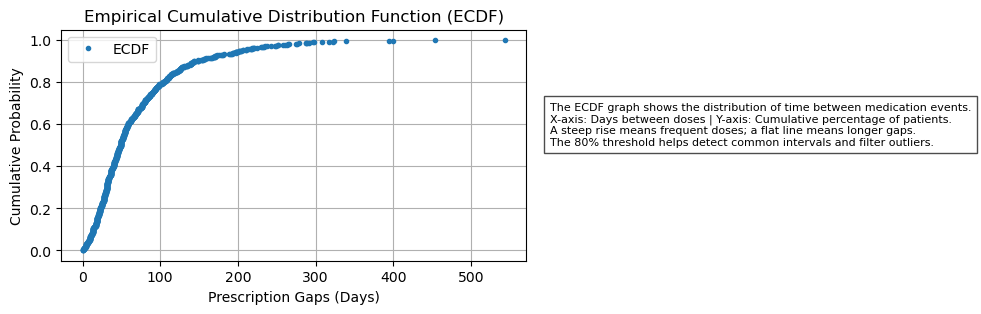

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

def compute_prescription_gaps(df):
    df["DATE"] = pd.to_datetime(df["DATE"])  
    df = df.sort_values(by=["PATIENT_ID", "DATE"])  
    df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)
    df["prescription_gaps"] = (df["DATE"] - df["prev_DATE"]).dt.days
    df = df.dropna(subset=["prescription_gaps"])  
    return df

def plot_ecdf(df):
    ecdf = ECDF(df["prescription_gaps"]) 

    plt.figure(figsize=(6, 3))
    plt.plot(ecdf.x, ecdf.y, marker=".", linestyle="none", label="ECDF")
    plt.xlabel("Prescription Gaps (Days)")
    plt.ylabel("Cumulative Probability")
    plt.title("Empirical Cumulative Distribution Function (ECDF)")
    plt.grid()
    plt.legend()

    text = (
        "The ECDF graph shows the distribution of time between medication events.\n"
        "X-axis: Days between doses | Y-axis: Cumulative percentage of patients.\n"
        "A steep rise means frequent doses; a flat line means longer gaps.\n"
        "The 80% threshold helps detect common intervals and filter outliers."
    )

    plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, fontsize=8,
             bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

df = pd.read_csv("med.events.csv")

df = compute_prescription_gaps(df)
plot_ecdf(df)


C:\Users\Light\AppData\Local\Temp\ipykernel_5344\679432039.py:43: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=df["Cluster"], y=df["prescription_gaps"], jitter=True, palette="viridis", alpha=0.7)
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


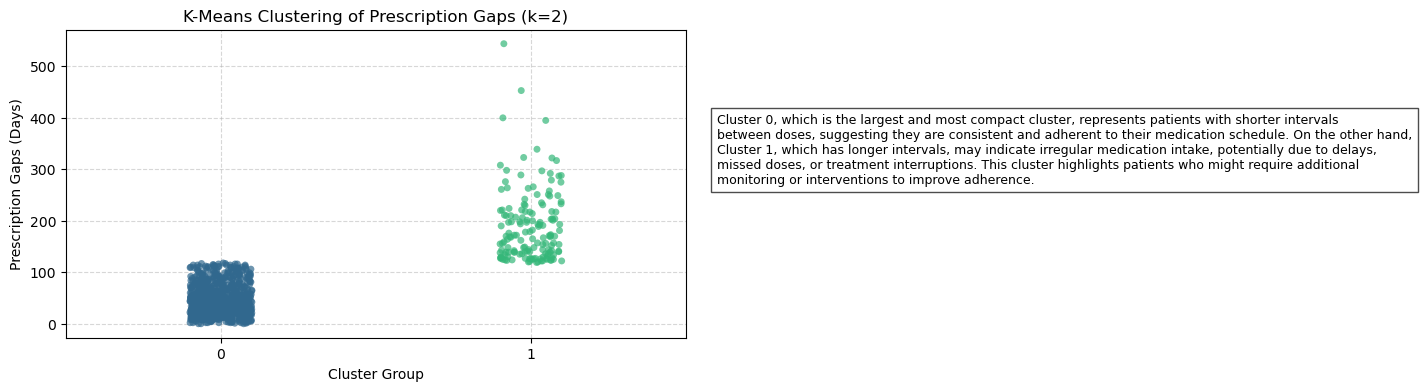

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

os.environ["OMP_NUM_THREADS"] = "4"  

def compute_event_intervals(df):
    df["DATE"] = pd.to_datetime(df["DATE"])  
    df = df.sort_values(by=["PATIENT_ID", "DATE"]) 
    df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)
    df["prescription_gaps"] = (df["DATE"] - df["prev_DATE"]).dt.days
    df = df.dropna(subset=["prescription_gaps"])  
    return df

def find_optimal_clusters(X, k_range=(2, 5)):
    best_k = 2
    best_score = -1

    for k in range(k_range[0], k_range[1]): 
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)

        if score > best_score:
            best_k = k
            best_score = score

    return best_k

def apply_kmeans(df, best_k):
    X = df["prescription_gaps"].values.reshape(-1, 1)  
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    df["Cluster"] = kmeans.fit_predict(X)
    return df

def plot_kmeans_clusters(df, best_k):
    df = df.sort_values(by="Cluster")  
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=df["Cluster"], y=df["prescription_gaps"], jitter=True, palette="viridis", alpha=0.7)
    plt.xlabel("Cluster Group")
    plt.ylabel("Prescription Gaps (Days)")
    plt.title(f"K-Means Clustering of Prescription Gaps (k={best_k})")
    plt.grid(True, linestyle="--", alpha=0.5)

    text = (
        "Cluster 0, which is the largest and most compact cluster, represents patients with shorter intervals \n"
        "between doses, suggesting they are consistent and adherent to their medication schedule. On the other hand,\n"
        "Cluster 1, which has longer intervals, may indicate irregular medication intake, potentially due to delays,\n"
        "missed doses, or treatment interruptions. This cluster highlights patients who might require additional\n"
        "monitoring or interventions to improve adherence."
    )
    plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

df = pd.read_csv("med.events.csv")

df = compute_prescription_gaps(df)
best_k = find_optimal_clusters(df["prescription_gaps"].values.reshape(-1, 1))
df = apply_kmeans(df, best_k)
plot_kmeans_clusters(df, best_k)
